<a name="start"></a>

# How to fine-tune a transformer model with Hugging Face 🤗 - Part 1

##  🔖 Learning objectives

1. In [A quick review of natural language processing](#overview) we will introduce transformer-based models and how they can help to deal with natural language tasks.
<br><br>
2. In [Loading the data](#data) we will learn how to load a dataset from the Hugging Face Hub.
<br><br>
3. In [Taking a bird’s-eye view of the ML pipeline for NLP](#ml_pipeline) we will learn about a common pipeline to fine tune language models.
<br><br>
4. In [Pre-processing phase](#preprocessing) we will learn how to prepare a dataset for training a language model.
<br><br>
5. In [Training phase](#training) we will discover the necessary steps to fine tune a transformer model to perform a down-stream task.
<br><br>
6. In [Post-processing/Evaluation phase](#evaluation) we will see how to evaluate a transformed-based model.
<br><br>
7. In [Improving the pipeline](#improve) we will explore different ways to improve the training loop.
<br><br>
8. In [Additional resources](#resources) contains plenty of additional materials to delve into transformers.

<a name="overview"></a>

## ✨ A quick review of natural language processing (NLP) ✨

> Go back to the [Learning objectives](#start)

Natural language processing (NLP) is the branch of AI that studies how computers can process human language in the form text or voice and make sense of those words.

NLP techniques can be used to solve a large variety of tasks such as:

- sentiment analysis
- machine translation
- natural language generation

NLP is notoriously known as one of the most challenging field in AI because human languages are ever-changing systems defined by complex sets of grammar rules. Languages also come with a variety of exceptions, ambiguities and irregularities that sometimes are not even explicitly formalized in written rules. For these reasons traditional approaches like rule-based programs have always struggled to perform tasks involving human languages.

This is where machine learning and specifically transformer models can help us.

## ✨ Transformers ✨

### ⭐ A bit of history ⭐

The transformer architecture was proposed in the seminal paper [Attention is all you need](https://arxiv.org/pdf/1706.03762.pdf) by Ashish Vaswani et al. in 2017. The original transformer model was specifically designed to perform machine translation (e.g. translating text from english to french and vice versa), but thanks to its effectiveness and flexibility, in the following years several other architectures have been developed based on this original idea. These transformer-based models represent the state-of-the-art models in most NLP tasks (e.g. summarization and question answering) and recently they have also been successfully employed to tackle computer vision (CV) tasks such as image classification and segmentation.

Over the years, the number of transformer-based models has grown exponentially and it would be pointless trying to learn all of them. However, there are four foundational models that any NLP practitioners should be aware of:

- [GPT](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf) was published by OpenAI in June 2018 and it represented the first pre-trained transformer model. It employs only the decoder part.


- [BERT](https://arxiv.org/pdf/1810.04805v2.pdf) is another pre-trained model published by Google in October 2018. It uses only the encoder part.


- [BART](https://arxiv.org/pdf/1910.13461v1.pdf) and [T5](https://arxiv.org/pdf/1910.10683v3.pdf) were published in October 2019 by Facebook and Google, respectively. They leverage both the encoder and decoder as the original transformer.

### ⭐ What makes the transformer models work so well ⭐

Fundamentally, there are two key features that make the transformer architecture so successful compared to other solutions:

1. transformer models can process sequential data (e.g. words in a sentence) all at once, taking full advantage of the parallelization capabilities offered by GPUs.

2. Transformer models incorporate **attention layers**. These special layers allow the model to pay attention to other sections of the input data when processing a specific point in the sequence. This aspect is extremely relevant in NLP where the meaning of words is heavily affected by the context.

### ⭐ The key components of the original transformer architecture ⭐

Essentially, the original transformer model is made of two pieces: the **encoder** and the **decoder**.

The encoder is a stack of smaller components, called **encoder blocks**, and each block can be further broken down into two sublayers:

- a **bidirectional** self-attention layer
- a feed-forward neural network

Similarly, the decoder is a stack of **decoder blocks**, but the internal sublayers are slightly different:

- a **masked** self-attention layer
- an **encoder-decoder** attention layer
- a feed-forward neural network

### ⭐ Three families of transformers ⭐

One interesting aspect of transformer models is their modular architecture: a transformer does not always require an encoder and a decoder to work properly. For this reason, they can be grouped in three main families based on the components they incorporate:

- **GPT-like** or **auto-regressive** models. These models use only the decoder part and they are well suited for generation tasks such as text and image generation.
- **BERT-like** or **auto-encoding** models. These models leverage only the encoder part and they work well for natural language understanding tasks such as text-classification, named entity recognition (i.e. word classification) and extractive question answering.
- **BART/T5-like** or **sequence-to-sequence** models. These models make use of both the encoder and the decoder. They are designed to perform generative task subject to a certain input such as translation and summarization.

Now that we have a basic understanding of transformers models and their components, let’s see how we can leverage one of these pre-trained models to perform sentiment analysis. Along the way, we will explore new concepts and we will dig deeper into some of the ideas we came across in this section.

<a id="exercise"></a>

## ✨ Fine-tuning a transformer model to recognize emotions 😂😢😡😃😯 ✨

We will fine-tune a transformer model to perform sentiment analysis on tweets.

From the ML perspective, sentiment analysis is just a sentence-classification task. We want to assign the right label to a sentence.

To do that we will use the Hugging Face library which is by far the most popular resource used by practitioners to perform NLP tasks with transformers. On Hugging Face we have access to all sorts of things, from pre-trained models to pre-processed datasets. All of the code is open-source and the API is extremely intuitive.

### ⭐ Setup ⭐

Transformer-based models are fairly large and even though we don't need to train one from scratch, we still want to take advantage of GPUs. Let's make sure we have access to one.

In [ ]:
!nvidia-smi

Sun Apr 10 12:44:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Now that we're sure we have access to a GPU, we can install the Hugging Face libraries:
- `datasets` gives us direct access to the datasets available on Hugging Face.
- `transformers[sentencepiece]` contains the model architectures and the pre-trained parameters.

In [ ]:
# pip install hugging face libraries
!pip install datasets -Uqq
!pip install transformers[sentencepiece] -Uqq

     |████████████████████████████████| 325 kB 3.0 MB/s 
     |████████████████████████████████| 136 kB 54.5 MB/s 
     |████████████████████████████████| 77 kB 8.3 MB/s 
     |████████████████████████████████| 212 kB 52.2 MB/s 
     |████████████████████████████████| 1.1 MB 39.6 MB/s 
     |████████████████████████████████| 127 kB 68.9 MB/s 
     |████████████████████████████████| 144 kB 51.8 MB/s 
     |████████████████████████████████| 94 kB 1.5 MB/s 
     |████████████████████████████████| 271 kB 51.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 4.0 MB 8.1 MB/s 
     |████████████████████████████████| 596 kB 68.4 MB/s 
     |████████████████████████████████| 6.5 MB 52.2 MB/s 
     |████████████████████████████████| 895

This piece of code is just to make sure we all get the same numbers...

In [ ]:
import numpy as np
import random
import torch

def set_seeds(seed=1234):
    """Set seeds for reproducibility."""
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
      torch.cuda.manual_seed(seed)
      torch.cuda.manual_seed_all(seed) 

set_seeds(2077)

<a name="data"></a>

### ⭐ Loading the data ⭐

> Go back to the [Learning objectives](#start)

 As we mentioned a moment ago, we want a model to classify sentences based on the expressed emotion. Thankfully we don't have to spend time to collect and create our own data because on Hugging Face we can easily access the [emotion dataset](https://huggingface.co/datasets/emotion). From the documentation on the Hugging Face website, we can get some basic information regarding the dataset. It contains English tweets labeled based on six emotions: joy, love, surprise, sadness, anger and fear.

The data is also conveniently divided in a train, validation and test set.

Loading the data in our environment is easy. We just need to import the `load_dataset` function from the `datasets` library and pass the name of the data we want as the first parameter.

In [ ]:
# load from hugging face hub
from datasets import load_dataset

dataset = load_dataset('emotion')

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

The data is store inside a `DatasetDict` object which is essentially a dictionary with additional functionalities. Each key-value pair corresponds to a dataset split. In our case we have three splits (train, validation and test) defined as a `Dataset` object which is another form of dictionariy.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

One handy feature of `Dataset` objects is that we can explore them as if there were lists.
By examining the train split we can see that `label` contains our target classes (i.e. our six emotions) encoded from 0 to 5 and `text` contains the tweets that we will feed to the transformer model as input features.

In [ ]:
# look at some examples
dataset['train'][:3]

{'label': [0, 0, 3],
 'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong']}

In [ ]:
dataset['train']['text'][:3]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong']

To figure out which target ID corresponds to which emotion we can access the `features` to take a look at the datatypes.
Our target variable is a `ClassLabel` object and its `names` attribute contains the names of the emotions in the correct order.

In [ ]:
# check features type
dataset['train'].features

{'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'text': Value(dtype='string', id=None)}

In [ ]:
dataset['train'].features['label'].names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

Let's save both the names and numbers of labels.
We can use the label names to create a dictionary mapping the IDs to labels and vice versa.
Instead, we will use the number of labels in a few moments to properly define the shape of the output vector of our transformer model.

In [ ]:
# get name and number of labels
label_names = dataset['train'].features['label'].names
num_labels = dataset['train'].features['label'].num_classes

In [ ]:
# map IDs to labels
ids2labels = {i: label for i, label in enumerate(label_names)}
ids2labels

{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

Here, we are just scratching the surface. Hugging Face `DatasetDict` and `Dataset` are extremely powerful objects that offer many other functionalities.

They are also well suited to perform exploratory data analysis (EDA). For the sake of simplicity, we won't perform any EDA, but when working on a real project, it is a step that we should definitely go through. To learn more about the [DatasetDict](https://huggingface.co/docs/datasets/master/en/package_reference/main_classes#datasetdict[[datasets.datasetdict]]) and [Dataset](https://huggingface.co/docs/datasets/master/en/package_reference/main_classes#datasets.Dataset) check out the official documentation.

Also keep in mind that there is no standard way to explore datasets. Each dataset has its own peculiarities and this affects how we interact and what we can do with them. That's why we encourage you, once you have gone through this notebook, to dedicate some time to explore other datasets. [Here](https://huggingface.co/datasets) you can find all the datasets currently available on Hugging Face. The different filters on the left-hand side makes the searching process straightforward.

#### ❓ Mini-Exercise: Load and explore the [yelp review dataset](https://huggingface.co/datasets/yelp_review_full)
Try to answer some basic questions:
- how many splits there are?
- what are the features?
- how many samples each split contains?
- what are the target labels?
- can you print out a small sample?

In [ ]:
# YOUR CODE HERE

<a name="ml_pipeline"></a>

### ⭐ Taking a bird’s-eye 🦅 view of the ML pipeline for NLP ⭐
> Go back to the [Learning objectives](#start)

Now that we have the data, we are ready to move to the actual ML pipeline for NLP tasks.
Again, there is no silver bullet, but usually it consists of three steps:
1. pre-processing phase: unfortunately we cannot feed raw text directly to transformer models. This is the reason why the first step is converting raw text into numbers. We will do that by using a tokenizer.
2. training phase: this is where we feed the pre-processed data to the model in order to update the parameters. We will use a pre-trained BERT to build our sentence-classification model.
3. post-processing/evaluation phase: in this step we take the model outputs and convert them into a format we can interpret. For our task, we will convert the transformer outputs into probabilities.

<a name="preprocessing"></a>

### ⭐ Pre-processing phase ⭐
> Go back to the [Learning objectives](#start)

**Tokenizers** are the perfect tools to pre-process raw text.
They take a list of sentences as input and return a list of integers plus any other optional output. **Tokens** are the atomic components of a sentence and depending on the tokenization strategy used they can be words, sub-words or even single characters. A **vocabulary** (or vocab) is a dictionary mapping tokens to integers and vice versa.
The integers in the output list are often called **token IDs**.

In general the tokenization process involves three steps:
1. the tokenizer receives the input text and breaks it down into tokens.
2. it assigns each token to an integer.
3. depending on the transformer model considered, the tokenizer adds special tokens to the vocab.

‼️ Different transformer models require different special tokens. That's why it's paramount to always make sure that the transformer and the tokenizer use the same vocabulary. ‼️

In practice, the first thing we need to do is to load a tokenizer from the Hugging Face library. `AutoTokenizer` is the generic tokenizer class and it can be instantiated based on a pre-trained model vocabulary using the `from_pretrained` method and passing the name of the model as argument.
As we have just mentioned, we will use a pre-trained BERT model called `bert-base-uncased` because generally  BERT-like models perform very well in sentence-classification tasks.

In most cases, the Hugging Face page provides useful information regarding the pre-trained models. [Here](https://huggingface.co/bert-base-uncased) we can find the page for our BERT model, while [here](https://huggingface.co/models) we can find the full list of pre-trained models available. In the long run, it always pays off to dedicate some time reading the model description in order to familiarize with them.

After defining our `AutoTokenizer` object, we can call it to get additional information:
-   `vocab_size` represents the number of tokens a tokenizer can distinguish. Ours can recognize 30,522 unique tokens.
-   `model_max_len` is an argument related to our transformer model and tells us the maximum length of the input sequences we can feed to the model. The BERT model we will use can accept inputs up to 512 tokens long.
- `padding_side` and `truncation_side` are two important concepts that define how the tokenizer will  handle inputs of different length when they are processed in batches:
  - **Padding** is the process of adding special tokens, called padding tokens, to sequences with fewer tokens.
  -  **Truncation** is the process of reducing the length of the sequences that are too long.

  To learn more about these two concepts check out the [documentation](https://huggingface.co/docs/transformers/master/en/preprocessing#pad).
- `special_tokens`, `sep_token`, `pad_token`, `cls_token` and `mask_token` describe all the extra tokens automatically added by the tokenizer when processing a sentence. These tokens guide the model to properly processing the input data.

In [ ]:
# create tokenizer
from transformers import AutoTokenizer

checkpoint = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenizer

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

PreTrainedTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

Now that we have our tokenizer, let's see how it works on a few sample sentences.
To do that we just need to pass a list of sentences to the tokenizer and it will automatically perform the three steps we mentioned earlier.
What we get as output is a dictionary containing three key-value pairs:
- `input_ids` contains the token IDs. In practice, they are the main input data of the transformer model.
- `attention_mask` defines which other parts of the input sentence the attention layers of the transformer model can attend to when processing a certain position. It's a list of booleans where 1 means the attention layers can pay attention to that token. There are two common situations where we want the attention layers to ignore certain token IDs:
 1. We are performing a generative task, such as text generation, and we don't want our model to peek at the tokens it hasn't generated yet. It would be like cheating!
 2. We are padding the input text and, since padding tokens don’t have any semantic meaning, we don’t want our model to make predictions based on those tokens.

 In our case we get only 1s because we are not trying to generate text and, at least for now, we haven't padded our sentences.
- Our BERT model can potentially digest a pair of sentences. We can find this information in the [model description](https://huggingface.co/bert-base-uncased#model-description). `token_type_ids` tells to the model if a certain token belongs to the first or second sentence. 0 indicates the first sentence and 1 the second one. Since in our example we are not dealing with pairs, we just get lists of 0s.

In [ ]:
# create sample
sample_text = dataset['train']['text'][:3]
sample_text

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong']

In [ ]:
# get token IDs
sample_output = tokenizer(sample_text)
sample_output

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

Using the `convert_ids_to_tokens` method we can convert a list of IDs back to tokens. This gives us a chance to get a better understanding of how the tokenizer works. The output list provides two interesting insights:
1. our tokenizer uses a sub-word tokenization strategy because we can see that the word 'didnt' has been split into 'didn' and '##t'.
2. it automatically takes care of special tokens. The [pre-processing description](https://huggingface.co/bert-base-uncased#preprocessing) informs us that the special token `[CLS]` represents the beginning of a sentence , whereas the `[SEP]` token is used to separate two paired sentences or signal the end of the input sentence.

In [ ]:
tokenizer.convert_ids_to_tokens(sample_output['input_ids'][0])

['[CLS]', 'i', 'didn', '##t', 'feel', 'humiliated', '[SEP]']

We can also get back the original input data by using the `decode` method. We need to set the argument `skip_special_tokens=True` to tell the tokenizer to drop any special tokens.

In [ ]:
tokenizer.decode(sample_output['input_ids'][0], skip_special_tokens=True)

'i didnt feel humiliated'

We can easily pad and truncate our sentences by setting `truncation=True` and `padding=True`.
To learn more about the different strategies available check the [documentation](https://huggingface.co/docs/transformers/master/en/preprocessing#everything-you-always-wanted-to-know-about-padding-and-truncation).

Now that we have familiarized ourselves with the tokenizer, we are ready to apply it to our three datasets. The most intuitive way is to pass the text data of each split to the tokenizer. More specifically, this approach can be broken down into 5 steps:
1. we create an empty `DatasetDict` object to collect both the raw and tokenized data
2. we pass the sentences of each split to the tokenizer. As we have just mentioned, we set `truncation=True` and `padding=True` to make sure the tokenized sequences have the same length.
3. we convert the output dictionary into a `Dataset` object.
4. we use the `concatenate_datasets` function from the `datasets` library to concatenate the raw and tokenized data together. This step is totally optional. There might be cases where we don't need to retain the original data.
5. we repeat step 2, 3 and 4 for all the remaining splits in our `DatasetDict`.

The final output of this process is a `DatasetDict` object containing for each split the raw and tokenized data.

In [ ]:
# tokenize splits
# ref: https://discuss.huggingface.co/t/add-new-column-to-a-dataset/12149

from datasets import DatasetDict, Dataset, concatenate_datasets

# instantiace a empty DatasetDict object
tokenized_datasets = DatasetDict()

for split in dataset.keys():
  # apply tokenizer to dataset split. It return a dictionary
  tokenized_split = tokenizer(dataset[split]['text'], truncation=True, padding=True)
  # convert dictionary into a Dataset object
  tokenized_split = Dataset.from_dict(tokenized_split)
  # add row data and tokenizer outputs to the DatasetDict object
  tokenized_datasets[split] = concatenate_datasets([dataset[split], tokenized_split], axis=1)

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

Let's double check that our tokenized sentences have the same length.

In [ ]:
# check length of tokenized input
samples = tokenized_datasets['train'][:10]
samples = {k: v for k, v in samples.items()}
[len(x) for x in samples['input_ids']]

[87, 87, 87, 87, 87, 87, 87, 87, 87, 87]

The process just described is intuitive and it works perfectly fine in most situations. However, it doesn't scale well with very large datasets. That's why we will explore an alternative approach which at the beginning might feel more convoluted, but in the long run will provide more flexibility  and capabilities.
This second approach revolves around two key concepts: mapping and dynamic padding

The `DatasetDict` class has a `map` method that enables us to apply a function to each dataset in the object. This function takes a dictionary as input and returns a dictionary as output.
In our specific case, the function will apply the tokenizer to our three datasets. The `map` method is designed in a way to automatically add the key-value pairs of the output dictionary created by the tokenizer to the pre-existing dictionary. That's why we no longer need to concatenate the data. To get more details about the map method check the [documentation](https://huggingface.co/docs/datasets/v2.0.0/en/package_reference/main_classes#datasets.DatasetDict.map).

‼️ Keep in mind that if a key already exists, the new values will replace the existing ones. ‼️

Dynamic padding is a separate step after the tokenization and in order to work properly it requires non padded data. That's why in the tokenization step we only apply truncation.

In addition, we set `batched=True` to provide a batch of data to the function to speed up the process.

In [ ]:
# tokenize input text
def get_tokens(split):
  return tokenizer(split['text'], truncation=True)

# lambda version
# tokenized_datasets = dataset.map(lambda split: tokenizer(split['text'], truncation=True), batched=True)

tokenized_datasets = dataset.map(get_tokens, batched=True)
tokenized_datasets

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

By default when we set `padding=True` the tokenizer pads all sentences to match the longest sentence in the entire dataset. Conversely, with dynamic padding we pad our data dynamically when forming the batches based on the longest sequence in each batch. As a result, the padded sequences in a specific batch have the same length, but they are likely to have a different one when compared to padded sequences in another batch.
In most cases dynamic padding speeds up training compared to normal padding because we avoid passing to the model over-long sequences containing uninfortmative pad tokens.

To apply dynamic padding we just need to import the class `DataCollatorWithPadding` from the `transformers` library and pass our tokenzier as argument. During training, the data collator will be responsible to create batches and dynamically pad the input sequences accordingly.

Let's see how it works on a sample.

As we can see, since we didn't apply padding,  our sequences in the sample have varying lengths after the tokenization. The next step consists in passing the sample to the `DataCollatorWithPadding` object to pad the input data based on the longest sequence in the sample, which in this case is 30 tokens. As expected, if we try to apply the data collator on a different sample we get a different maximum length (44 tokens).

In [ ]:
# create sample and check length of tokenized input
samples = tokenized_datasets['train'][:10]
samples = {k: v for k, v in samples.items() if k not in ['text', 'label']}
[len(x) for x in samples['input_ids']]

[7, 23, 12, 22, 8, 17, 30, 20, 25, 6]

In [ ]:
# create data collator
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# check padding
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

{'attention_mask': torch.Size([10, 30]),
 'input_ids': torch.Size([10, 30]),
 'token_type_ids': torch.Size([10, 30])}

In [ ]:
# test data collator on a different sample
samples = tokenized_datasets['train'][10:20]
samples = {k: v for k, v in samples.items() if k not in ['text', 'label']}
print([len(x) for x in samples['input_ids']], '\n')

batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

[16, 23, 14, 10, 44, 12, 9, 10, 25, 19] 



{'attention_mask': torch.Size([10, 44]),
 'input_ids': torch.Size([10, 44]),
 'token_type_ids': torch.Size([10, 44])}

We have finally come to the end of the pre-processing phase and we are ready to move to the training phase.

#### ❓ Mini-Exercise: Go through the preprocessing step once again, but this time try a different model like for example [RoBERTa](https://huggingface.co/roberta-base).
Is the tokenization the same as the previous model?

In [ ]:
# YOUR CODE HERE

<a name="training"></a>

### ⭐ Training phase ⭐
> Go back to the [Learning objectives](#start)

The training phase with the Hugging Face library can be deconstructed into four steps:
1. define the model
2. specify the training arguments
3. define the training loop
4. Fine-tune (or train for scratch)  the model

Since our objective is to classify sentences based on their semantic meaning we need to import the `AutoModelForSequenceClassification` from the `transformers` library specifying the checkpoint and the number of output classes. The BERT checkpoint we’re trying to use was pre-trained to perform a fill-mask and a next-sentence-prediction task. When we import `AutoModelForSequenceClassification` we are telling the library we want to perform sequence-classification and, as a consequence, it automatically replaces the original model **head** with a new one specifically designed for our down-stream task. The term head refers to the last layer (or the last few layers) in the model architecture and is responsible to project the transformer outputs onto the proper vector space. In other words, we can adapt a pre-trained transformer model to perform any task by simply changing its head and leaving all the rest (i.e. the **backbone**) as it is.
However, when we change head its parameters are initialized with random vaues. That’s why we get a warning suggesting us to train the model to be able to use it for predictions and inference.
For this specific BERT model we can actually take a look at the new head using the `classifier` attribute. As we can see, it's just a linear layer mapping the 768-dimensional vectors generated by the last hidden layer to a 6-dimensional vector space.

The `transformers` library provides classes to perform all sorts of down-stream tasks. You can find them in the [documentation](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModel).

In [ ]:
# create model
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# new model head
model.classifier

Linear(in_features=768, out_features=6, bias=True)

The next step is to define the training arguments. We can do this by importing the `TrainingArguments` from the `transformers` library. The only required parameter is the `output_dir` which specifies the output directory for the model predictions and checkpoints. In our case we provide three optional parameters:
- `num_train_epochs` defines the number of training epochs
- `evaluation_strategy` tells the training script to evaluate the model at the end of each epoch
- `fp16` gives us the option to use 16-bit (mixed) precision instead of 32-bit to speed up training.

Check out the [documentation](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments) to take a look at the full list of optional parameters.

In [ ]:
# define training arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='trainer-run#0001',
    num_train_epochs=1,
    evaluation_strategy='epoch',
    fp16=True
)

Actually before we can move to the third step, there is one last bit of pre-processing we need to do:
- remove all the unnecessary columns in `features`. In our case the only column we need to remove is `text`.
- rename the column containing the ground truth classes `labels` because the training script by default will look for that column to compute the loss. This aspect is mentioned in the [documentation](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments.label_names).
- set the format for every dataset. We set the  `torch` format because we are using Pytorch.

In [ ]:
# clean up dataset
tokenized_datasets = tokenized_datasets.remove_columns('text')
tokenized_datasets = tokenized_datasets.rename_column('label', 'labels')
tokenized_datasets.set_format('torch')
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

To define our training loop we simply need to import the `Trainer` class from the `transformers` library. This class contains a basic training loop which supports all the items we have generated so far:
- pre-trained model
- training arguments
- pre-processed data
- data collator
- tokenizer

As always we can learn more about this class by checking out the official [documentation](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer).

In [ ]:
# create trainer
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    data_collator=data_collator,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer
)

Using amp half precision backend


Now that all the pieces are in place, we can finally fine-tune our transformer model by calling the `train` method. By default the training loop reports back only the training and the validation loss. Unfortunately, from a human perspective those values are not very informative. Instead, we would like to see metrics like accuracy, precision and recall. We will  see how we can add those metrics to the training loop in just a moment, but first let's briefly jump to the evaluation phase where we can see how to evaluate our model and make predictions.

In [ ]:
# fine-tune model
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 16000
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2000


Epoch,Training Loss,Validation Loss
1,0.212300,0.177955


Saving model checkpoint to trainer-run#0001/checkpoint-500
Configuration saved in trainer-run#0001/checkpoint-500/config.json
Model weights saved in trainer-run#0001/checkpoint-500/pytorch_model.bin
tokenizer config file saved in trainer-run#0001/checkpoint-500/tokenizer_config.json
Special tokens file saved in trainer-run#0001/checkpoint-500/special_tokens_map.json
Saving model checkpoint to trainer-run#0001/checkpoint-1000
Configuration saved in trainer-run#0001/checkpoint-1000/config.json
Model weights saved in trainer-run#0001/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in trainer-run#0001/checkpoint-1000/tokenizer_config.json
Special tokens file saved in trainer-run#0001/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to trainer-run#0001/checkpoint-1500
Configuration saved in trainer-run#0001/checkpoint-1500/config.json
Model weights saved in trainer-run#0001/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in trainer-run#0001/checkpo

TrainOutput(global_step=2000, training_loss=0.38520724105834964, metrics={'train_runtime': 184.3258, 'train_samples_per_second': 86.803, 'train_steps_per_second': 10.85, 'total_flos': 339429562491168.0, 'train_loss': 0.38520724105834964, 'epoch': 1.0})

#### ❓ Mini-Exercise: Go through the training step once again and time time try to  around with the trainer arguments. For example, you could change:
- the batch size
- the learning rate
- how often the model is evaluated
- how often the model saves the checkpoint

In [ ]:
# YOUR CODE HERE

<a name="evaluation"></a>

### ⭐ Post-processing/Evaluation phase ⭐

To evaluate a model is simple. We just need to call the `evaluate` method and pass a dataset as a parameter.

In [ ]:
trainer.evaluate(tokenized_datasets['test'])

***** Running Evaluation *****
  Num examples = 2000
  Batch size = 8


{'epoch': 1.0,
 'eval_loss': 0.19188867509365082,
 'eval_runtime': 4.0431,
 'eval_samples_per_second': 494.675,
 'eval_steps_per_second': 61.834}

Generating the predictions is slightly more convolutated because we need to apply a bit of post-processing.

In fact, after calling the `predict` method we get a `PredictionOutput` object containing three items:
- `predictions` consists of a matrix with a row for each input sequence and a column for each label. In our case, we have 2000 rows and 6 columns, therefore we get a 2000 x 6 matrix. Each row vector contains **logits** which represent the unnormalized output scores of the transformer model. We can interpret these scores as probabilities by passing them through a **softmax function**. The actual prediction is the class corresponding to the index with the largest logit (or probability).
- `label_ids` contains the ground truth labels
- `metrics` contains the metrics. For the moment we have only the loss.

In [ ]:
predictions = trainer.predict(tokenized_datasets['test'])
predictions 

***** Running Prediction *****
  Num examples = 2000
  Batch size = 8


PredictionOutput(predictions=array([[ 7.215  , -1.412  , -1.734  , -0.984  , -1.61   , -1.484  ],
       [ 7.285  , -1.78   , -1.742  , -1.078  , -1.317  , -1.413  ],
       [ 7.223  , -1.898  , -1.807  , -1.092  , -1.128  , -1.452  ],
       ...,
       [-2.326  ,  6.58   , -0.3184 , -1.887  , -1.687  , -1.321  ],
       [-2.297  ,  6.38   , -0.06232, -2.316  , -1.183  , -1.547  ],
       [-2.316  , -0.9844 , -1.435  , -2.07   ,  4.11   ,  3.473  ]],
      dtype=float16), label_ids=array([0, 0, 0, ..., 1, 1, 4]), metrics={'test_loss': 0.19188867509365082, 'test_runtime': 5.7327, 'test_samples_per_second': 348.878, 'test_steps_per_second': 43.61})

In [ ]:
predictions.predictions.shape, predictions.label_ids.shape

((2000, 6), (2000,))

In practice, to turn logits into probabilities we import the `softmax` function from `torch.nn.functional`
and pass the logit scores as `torch.Tensor`. We need to set `dim=-1` to make sure the softmax function is applied across columns and not rows.
To get the index of the largest logit/probability (i.e. the actual prediction) we can use the `argmax` function available in `numpy`. Again, we need to specify `axis=-1` to apply the function across columns.

In [ ]:
import numpy as np
import torch
from torch.nn.functional import softmax

logits = predictions.predictions
# targets = predictions.label_ids
probs = softmax(torch.Tensor(logits), dim=-1)
preds = np.argmax(logits, axis=-1)

In [ ]:
# check probabilities
probs

tensor([[9.9910e-01, 1.7905e-04, 1.2972e-04, 2.7476e-04, 1.4685e-04, 1.6657e-04],
        [9.9918e-01, 1.1550e-04, 1.1998e-04, 2.3309e-04, 1.8349e-04, 1.6674e-04],
        [9.9912e-01, 1.0924e-04, 1.1974e-04, 2.4474e-04, 2.3605e-04, 1.7069e-04],
        ...,
        [1.3553e-04, 9.9802e-01, 1.0093e-03, 2.1033e-04, 2.5695e-04, 3.7023e-04],
        [1.7019e-04, 9.9719e-01, 1.5900e-03, 1.6690e-04, 5.1862e-04, 3.6029e-04],
        [1.0496e-03, 3.9766e-03, 2.5351e-03, 1.3424e-03, 6.4819e-01, 3.4291e-01]])

In [ ]:
# check predictions
preds

array([0, 0, 0, ..., 1, 1, 4])

This is the end of this section.

In the next one we will explore few different way to improve the current pipeline, including how to:
- pass more meaningful metrics to the training loop
- save the model checkpoint locally or on a cloud storage
- evaluate the model through more elegant visualizations

<a name="improve"></a>

### ⭐ Improving the pipeline ⭐

> Go back to the [Learning objectives](#start)

#### Adding metrics

Now that we know how to evaluate our model and generate predictions, first nice addition would be the possibility to look at more meaningful metrics. 
To do that first we need to import the `load_metric` function from the `datasets` library and pass the name of the metric we want as an argument. Each metric takes as input the predicted and the ground truth values plus any additional metric-specific argument.
Since we are dealing with a classification task,  we add accuracy, precision, recall and F1 score to the training procedure.

We can  check the full list of metrics available using the `list_metrics` function from the `datasets` library.

In [ ]:
from datasets import load_metric

accuracy_metric = load_metric('accuracy')
precision_metric = load_metric('precision')
recall_metric = load_metric('recall')
f1_metric = load_metric('f1')

In [ ]:
print(accuracy_metric.compute(predictions=preds, references=predictions.label_ids))
print(precision_metric.compute(predictions=preds, references=predictions.label_ids, average='weighted'))
print(recall_metric.compute(predictions=preds, references=predictions.label_ids, average='weighted'))
print(f1_metric.compute(predictions=preds, references=predictions.label_ids, average='weighted'))

{'accuracy': 0.929}
{'precision': 0.928007871781864}
{'recall': 0.929}
{'f1': 0.9283332983256687}


In [ ]:
from datasets import list_metrics
list_metrics()

The `Trainer` class has an ad hoc parameter called `compute_metrics` that enables us to pass a function to compute the metrics during the evaluation phase. This function takes a `PredictionOutput` object as input and returns a dictionary containing the metric values.

Let's define this function and manually test it on the predictions we got a few moments ago.

In [ ]:
# define function to compute metrics
def compute_metrics_fn(eval_preds):
  metrics = dict()
  
  accuracy_metric = load_metric('accuracy')
  precision_metric = load_metric('precision')
  recall_metric = load_metric('recall')
  f1_metric = load_metric('f1')

  logits = eval_preds.predictions
  labels = eval_preds.label_ids
  preds = np.argmax(logits, axis=-1)  
  
  metrics.update(accuracy_metric.compute(predictions=preds, references=labels))
  metrics.update(precision_metric.compute(predictions=preds, references=labels, average='weighted'))
  metrics.update(recall_metric.compute(predictions=preds, references=labels, average='weighted'))
  metrics.update(f1_metric.compute(predictions=preds, references=labels, average='weighted'))

  return metrics

In [ ]:
# test function
metrics = compute_metrics_fn(predictions)
metrics

{'accuracy': 0.929,
 'f1': 0.9283332983256687,
 'precision': 0.928007871781864,
 'recall': 0.929}

At a first glance, it seems our `compute_metrics_fn` works as expected. Let's run again the training loop with just a few changes:
- train for 3 epochs, rather than just 1
- pass larger batches to the model by setting the `per_device_train_batch_size` argument
- keep the best model by setting `load_best_model_at_end=True`
- compute the metrics by passing the function we have just created to the training loop through the `compute_metrics` argument.

In [ ]:
# define model
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels)

# define training arguments
training_args = TrainingArguments(
    'trainer-run#0002',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    fp16=True
)

In [ ]:
# define training loop
trainer = Trainer(
  model,
  training_args,
  train_dataset=tokenized_datasets['train'],
  eval_dataset=tokenized_datasets['validation'],
  data_collator=data_collator,
  tokenizer=tokenizer,
  compute_metrics=compute_metrics_fn,
)

Using amp half precision backend


In [ ]:
# fine-tune model
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 16000
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3000


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.226400,0.199119,0.935000,0.940978,0.935000,0.935969
2,0.119400,0.132668,0.935000,0.935721,0.935000,0.934792
3,0.078700,0.173672,0.938500,0.940526,0.938500,0.938868


***** Running Evaluation *****
  Num examples = 2000
  Batch size = 8
Saving model checkpoint to trainer-run#0002/checkpoint-1000
Configuration saved in trainer-run#0002/checkpoint-1000/config.json
Model weights saved in trainer-run#0002/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in trainer-run#0002/checkpoint-1000/tokenizer_config.json
Special tokens file saved in trainer-run#0002/checkpoint-1000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 8
Saving model checkpoint to trainer-run#0002/checkpoint-2000
Configuration saved in trainer-run#0002/checkpoint-2000/config.json
Model weights saved in trainer-run#0002/checkpoint-2000/pytorch_model.bin
tokenizer config file saved in trainer-run#0002/checkpoint-2000/tokenizer_config.json
Special tokens file saved in trainer-run#0002/checkpoint-2000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 8
Saving model checkpoint to trainer-run#000

TrainOutput(global_step=3000, training_loss=0.2011304931640625, metrics={'train_runtime': 399.1504, 'train_samples_per_second': 120.255, 'train_steps_per_second': 7.516, 'total_flos': 1161520801033536.0, 'train_loss': 0.2011304931640625, 'epoch': 3.0})

In [ ]:
trainer.evaluate(tokenized_datasets['test'])

***** Running Evaluation *****
  Num examples = 2000
  Batch size = 8


{'epoch': 3.0,
 'eval_accuracy': 0.93,
 'eval_f1': 0.9304119781172865,
 'eval_loss': 0.18988770246505737,
 'eval_precision': 0.9323717575998934,
 'eval_recall': 0.93,
 'eval_runtime': 6.7176,
 'eval_samples_per_second': 297.724,
 'eval_steps_per_second': 37.215}

WOW!🥂 After training for just 3 epochs we reach almost 95% in accuracy on the test set and the other metrics look good.

Let’s define a function to automatically convert logits into label IDs.Then we import the `classification_report` and `ConfusionMatrixDisplay` functions from `sklearn.metrics` and pass the ground truth and predicted labels to those two functions. The `classification_report` function generates a detailed report providing additional information for each label, whereas the `ConfusionMatrixDisplay` function returns a neat confusion matrix showing where our sentence-classification model performs well and where it falls short.
For instance, by looking at the numbers in the confusion matrix, it is apparent that the model sometimes mixes up joy and love  and misinterprets fear as surprise.

In [ ]:
# define fuction to convert logits into label IDs

def get_predictions(dataset, model):
  raw_preds = model.predict(dataset)
  logits = raw_preds.predictions
  targets = raw_preds.label_ids
  preds = np.argmax(logits, axis=-1)

  return (targets, preds)

# get indexes and target labels
targets, preds = get_predictions(tokenized_datasets['test'], trainer)

***** Running Prediction *****
  Num examples = 2000
  Batch size = 8


In [ ]:
# print out classificatio report

from sklearn.metrics import classification_report

print(classification_report(targets, preds, target_names=label_names))

              precision    recall  f1-score   support

     sadness       0.96      0.97      0.97       581
         joy       0.97      0.93      0.95       695
        love       0.79      0.92      0.85       159
       anger       0.93      0.91      0.92       275
        fear       0.87      0.91      0.89       224
    surprise       0.79      0.70      0.74        66

    accuracy                           0.93      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.93      0.93      0.93      2000



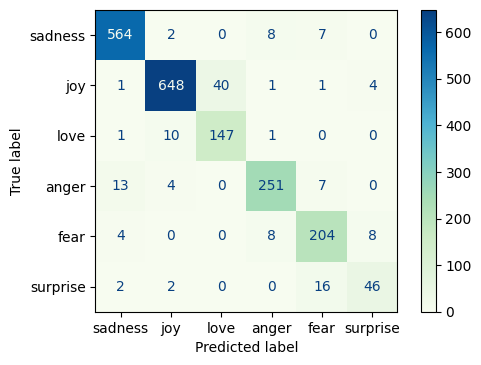

In [ ]:
# plot confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

fig, ax = plt.subplots(dpi=100)
ConfusionMatrixDisplay.from_predictions(targets,
                                        preds,
                                        display_labels=label_names,
                                        cmap='GnBu',
                                        ax=ax
                                        )

plt.show()

#### Saving model checkpoint
This few bits of code show how to save a model checkpoint locally or on the cloud:
- we zip the checkpoint folder we want to save using `shutil.make_archive`. The first argument is the name of the file to create, the second is the format and the third is the input directory.
- we use `shutil.copy` to copy the zip folder to another location. In this example, we copy the checkpoint on Google Drive.

‼️ Make sure to adjust the `base_name`, `root_dir`, `src` and `dst` parameters accordingly to the environment used. ‼️

In [ ]:
# create archive
import shutil

shutil.make_archive(base_name='/content/last_checkpoint',
                    format='zip',
                    root_dir='/content/trainer-run#0002/checkpoint-2000')

In [ ]:
# copy checkpoint in different location
shutil.copy(src='/content/drive/MyDrive/transformers/mar28_last_checkpoint.zip',
            dst='/content/last_checkpoint.zip')

<a name="resources"></a>

## 📚 Additional resources

> Go back to the [Learning objectives](#start)

1. The [Hugging Face course](https://huggingface.co/course/chapter1/1) teaches additional topics we didn't cover in this notebook.
<br><br>
2. If you prefer books, [Natural Language Processing with Transformers](https://transformersbook.com/) by  Lewis Tunstall, Leandro von Werra, and Thomas Wolf is the perfect resource to learn more about NLP and transformers.
<br><br>
3. [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/) and [The Illustrated BERT](https://jalammar.github.io/illustrated-bert/) by Jay Alammar are two great blog posts full of amazing visualizations to further explore transformers.
<br><br>
4. [The Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html) by Harvard NLP goes through the original paper "Attention is All You Need" showing how to implement the transformer architecture in PyTorch line by line.